In [2]:
!pip install criticalpath


  Preparing metadata (setup.py) ... done
  Created wheel for criticalpath: filename=criticalpath-0.1.5-py3-none-any.whl size=12028 sha256=0e76ad468da1d10655414ddbe9743c259d8953f28a4f097fdcd23eeaa2cf691e
  Stored in directory: /root/.cache/pip/wheels/cd/48/07/ead88c1969e7d36a113558364b0e8fc7590f2d7c85481a6dde
Successfully built criticalpath


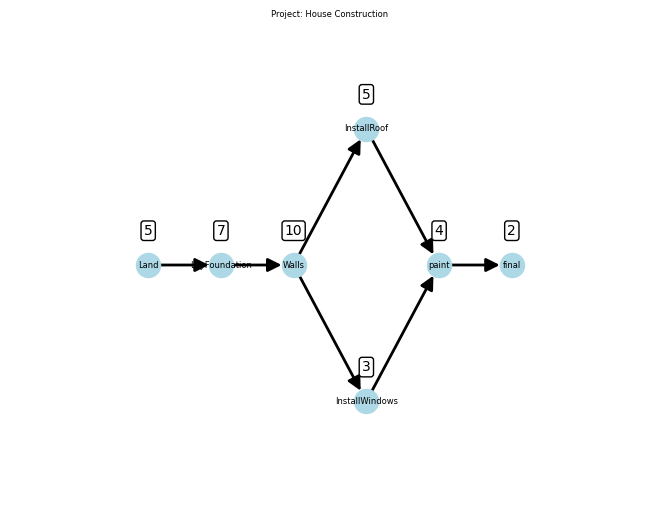

The critical path is: ['Land', 'LayFoundation', 'Walls', 'InstallRoof', 'paint', 'final']
The project duration is: 33 days


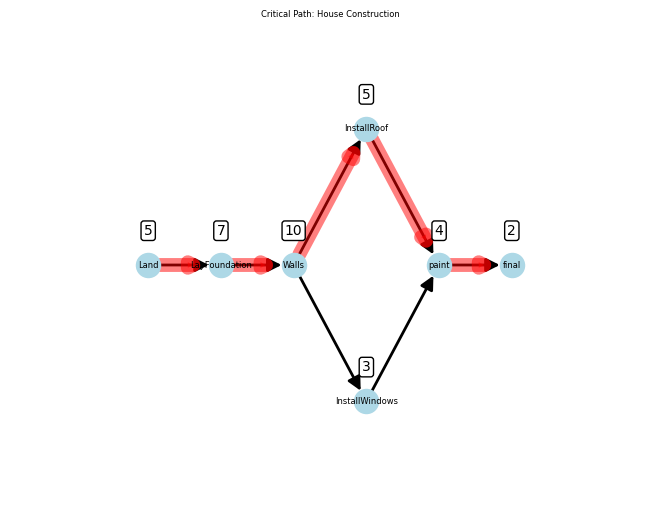


Task Floats:
Task: Land, Total Float: 0 days
Task: LayFoundation, Total Float: 0 days
Task: Walls, Total Float: 0 days
Task: InstallRoof, Total Float: 0 days
Task: InstallWindows, Total Float: 2 days
Task: paint, Total Float: 0 days
Task: final, Total Float: 0 days


In [3]:
import networkx as nx
from criticalpath import Node
import matplotlib.pyplot as plt


tasks = [
    ("Land", {"Duration": 5}),
    ("LayFoundation", {"Duration": 7}),
    ("Walls", {"Duration": 10}),
    ("InstallRoof", {"Duration": 5}),
    ("InstallWindows", {"Duration": 3}),
    ("paint", {"Duration": 4}),
    ("final", {"Duration": 2})
]

dependencies = [
    ("Land", "LayFoundation"),
    ("LayFoundation", "Walls"),
    ("Walls", "InstallRoof"),
    ("Walls", "InstallWindows"),
    ("InstallRoof", "paint"),
    ("InstallWindows", "paint"),
    ("paint", "final") #
]

# GRAPH
G = nx.DiGraph()
G.add_nodes_from(tasks)
G.add_edges_from(dependencies)


pos_nodes = {
    "Land": (1, 3),
    "LayFoundation": (2, 3),
    "Walls": (3, 3),
    "InstallRoof": (4, 4),
    "InstallWindows": (4, 2),
    "paint": (5, 3),
    "final": (6, 3)
}

# PLOT GRAPH
nx.draw(G, with_labels=True, pos=pos_nodes, node_color='lightblue', arrowsize=20, font_size=6, width=2)
pos_attrs = {node: (coord[0], coord[1] + 0.2) for node, coord in pos_nodes.items()}
attrs = {node[0]: node[1]["Duration"] for node in tasks}
nx.draw_networkx_labels(G, pos=pos_attrs, labels=attrs, font_size=10, verticalalignment='bottom', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))
plt.margins(0.3)
plt.title("Project: House Construction", fontsize=6)
plt.show()

# DEFINE CRITICAL
def create_project(tasks, dependencies):
    proj = Node('HouseProject')

    for t in tasks:
        proj.add(Node(t[0], duration=t[1]["Duration"]))

    for d in dependencies:
        proj.link(d[0], d[1])

    proj.update_all()
    return proj

# project
proj = create_project(tasks, dependencies)

# duration and critical path
crit_path = [str(n) for n in proj.get_critical_path()]
proj_duration = proj.duration

print(f"The critical path is: {crit_path}")
print(f"The project duration is: {proj_duration} days")

# show critical path on graph
crit_edges = [(n, crit_path[i+1]) for i, n in enumerate(crit_path[:-1])]
nx.draw(G, with_labels=True, pos=pos_nodes, node_color='lightblue', arrowsize=20, font_size=6, width=2)
nx.draw_networkx_labels(G, pos=pos_attrs, labels=attrs, font_size=10, verticalalignment='bottom', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))
nx.draw_networkx_edges(G, pos=pos_nodes, edgelist=crit_edges, width=10, alpha=0.5, edge_color='r')
plt.margins(0.3)
plt.title("Critical Path: House Construction", fontsize=6)
plt.show()
def calculate_float(proj):
    print("\nTask Floats:")
    for task in proj.nodes:
        early_start = task.es
        late_start = task.ls
        total_float = late_start - early_start
        print(f"Task: {task.name}, Total Float: {total_float} days")

# Calculate and print float values
calculate_float(proj)
